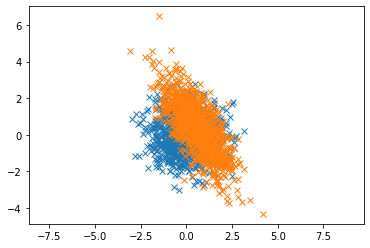

In [3]:
from __future__ import print_function
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

######## Data Generation ############
np.random.seed(0)
x,y = np.random.multivariate_normal([0,0],[[1,0],[0,1]],1000).T
data1 = np.append(x.reshape(1000,1),y.reshape(1000,1),axis=1)
labels1 = (np.ones(1000))*-1
x,y = np.random.multivariate_normal([0.5,0.5],[[1,-1],[-1,2]],1000).T
data2 = np.append(x.reshape(1000,1),y.reshape(1000,1),axis=1)
labels2 = np.ones(1000)
data = np.append(data1,data2, axis=0)
labels = np.append(labels1, labels2, axis=0)
labels = labels.reshape(2000,1)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
plt.plot(data1[:,:1],data1[:,1:],'x')
plt.plot(data2[:,:1],data2[:,1:],'x')
plt.axis('equal'); plt.show()

In [4]:
############# Converting Data from numpy to tensors

import torch
import torch.nn as nn


X = torch.tensor(X_train, dtype=torch.float) 
y = torch.tensor(y_train, dtype=torch.float) 
xPredicted = torch.tensor(X_test, dtype=torch.float)

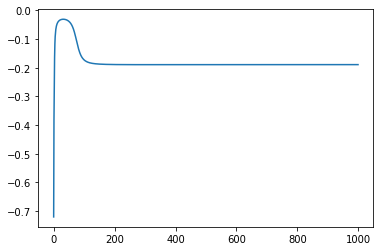

Accuracy of model with bias:  0.4975


In [24]:
############## Model without bias   ###############

class Neural_Network(nn.Module):
    def __init__(self, ):
        super(Neural_Network, self).__init__()
        # parameters
        # TODO: parameters can be parameterized instead of declaring them here
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize1 = 3
        self.hiddenSize2 = 5
        self.hiddenSize3 = 3
        self.eta = 0.01
        
        # weights
        self.W1 = torch.randn(self.inputSize, self.hiddenSize1) 
        self.W2 = torch.randn(self.hiddenSize1, self.hiddenSize2)
        self.W3 = torch.randn(self.hiddenSize2, self.hiddenSize3) 
        self.W4 = torch.randn(self.hiddenSize3, self.outputSize)
        self.B1 = torch.randn(self.hiddenSize1)
        self.B2 = torch.randn(self.hiddenSize2)
        self.B3 = torch.randn(self.hiddenSize3)
        self.B4 = torch.randn(self.outputSize)
        
    def forward(self, X):
        self.H1 = self.sigmoid(torch.matmul(X, self.W1))
        self.H2 = self.sigmoid(torch.matmul(self.H1, self.W2))
        self.H3 = self.sigmoid(torch.matmul(self.H2, self.W3))
        self.O = torch.matmul(self.H3, self.W4)
        o = self.sigmoid(self.O)
        return o
        
    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))
    
    def tanh(self, s):
        return (2/(1+torch.exp(-2*s))) - 1
    
    def sigmoidPrime(self, s):
        # derivative of sigmoid
        return s * (1 - s)
    
    def tanhPrime(self, s):
        #derivative of tanh
        return 1 - (s*s)
    
    def backward(self, X, y, o):
        self.o_error = y - o # error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # derivative of sig to error
        self.H3_error = torch.matmul(self.o_delta, torch.t(self.W4))
        self.H3_delta = self.H3_error * self.sigmoidPrime(self.H3)
        self.H2_error = torch.matmul(self.H3_delta, torch.t(self.W3))
        self.H2_delta = self.H2_error * self.sigmoidPrime(self.H2)
        self.H1_error = torch.matmul(self.H2_delta, torch.t(self.W2))
        self.H1_delta = self.H1_error * self.sigmoidPrime(self.H1)
        self.W1 += torch.matmul(torch.t(X), self.H1_delta) * self.eta
        self.W2 += torch.matmul(torch.t(self.H1), self.H2_delta) * self.eta
        self.W3 += torch.matmul(torch.t(self.H2), self.H3_delta) * self.eta
        self.W4 += torch.matmul(torch.t(self.H3), self.o_delta) * self.eta                     
        return self.o_error
        
    def train(self, X, y):
        # forward + backward pass for training
        o = self.forward(X)
        lr = self.backward(X, y, o)
        return lr
        
    def saveWeights(self, model):
        # we will use the PyTorch internal storage functions
        torch.save(model, "NN")
        params = model.parameters()


NN = Neural_Network()
learning_rate = []
for i in range(1000):  # trains the NN 1,000 times
    l_r = NN.train(X, y)
    learning_rate.append(torch.sum(l_r)/X.shape[0])

plt.plot(list(range(1000)), learning_rate)
plt.show()
    
    
NN.saveWeights(NN)
output = NN.forward(xPredicted)
y_pred = []

for i in range(len(output)):
    if(output[i]>0.48):
        y_pred.append(1)
    else:
        y_pred.append(-1)
        
acc = accuracy_score(y_test, y_pred)
print("Accuracy of model with bias: ", acc)

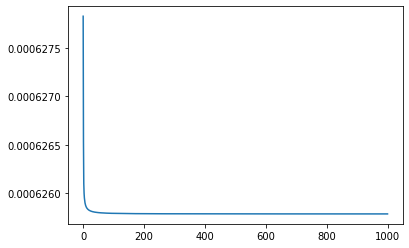

Accuracy of model with bias:  0.5025


In [35]:
############## Model without bias   ###############

class Neural_Network(nn.Module):
    def __init__(self, ):
        super(Neural_Network, self).__init__()
        # parameters
        # TODO: parameters can be parameterized instead of declaring them here
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize1 = 3
        self.hiddenSize2 = 5
        self.hiddenSize3 = 3
        self.eta = 0.01
        
        # weights
        self.W1 = torch.randn(self.inputSize, self.hiddenSize1) 
        self.W2 = torch.randn(self.hiddenSize1, self.hiddenSize2)
        self.W3 = torch.randn(self.hiddenSize2, self.hiddenSize3) 
        self.W4 = torch.randn(self.hiddenSize3, self.outputSize)
        self.B1 = torch.randn(self.hiddenSize1)
        self.B2 = torch.randn(self.hiddenSize2)
        self.B3 = torch.randn(self.hiddenSize3)
        self.B4 = torch.randn(self.outputSize)
        
    def forward(self, X):
        self.H1 = self.sigmoid(torch.matmul(X, self.W1))
        self.H2 = self.sigmoid(torch.matmul(self.H1, self.W2))
        self.H3 = self.sigmoid(torch.matmul(self.H2, self.W3))
        self.O = torch.matmul(self.H3, self.W4)
        o = self.sigmoid(self.O)
        return o
        
    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))
    
    def tanh(self, s):
        return (2/(1+torch.exp(-2*s))) - 1
    
    def sigmoidPrime(self, s):
        # derivative of sigmoid
        return s * (1 - s)
    
    def tanhPrime(self, s):
        #derivative of tanh
        return 1 - (s*s)
    
    def backward(self, X, y, o):
        self.o_error = max(0, 1-torch.sum(y*o)/X.shape[0]) # error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # derivative of sig to error
        self.H3_error = torch.matmul(self.o_delta, torch.t(self.W4))
        self.H3_delta = self.H3_error * self.sigmoidPrime(self.H3)
        self.H2_error = torch.matmul(self.H3_delta, torch.t(self.W3))
        self.H2_delta = self.H2_error * self.sigmoidPrime(self.H2)
        self.H1_error = torch.matmul(self.H2_delta, torch.t(self.W2))
        self.H1_delta = self.H1_error * self.sigmoidPrime(self.H1)
        self.W1 += torch.matmul(torch.t(X), self.H1_delta) * self.eta
        self.W2 += torch.matmul(torch.t(self.H1), self.H2_delta) * self.eta
        self.W3 += torch.matmul(torch.t(self.H2), self.H3_delta) * self.eta
        self.W4 += torch.matmul(torch.t(self.H3), self.o_delta) * self.eta                     
        return self.o_error
        
    def train(self, X, y):
        # forward + backward pass for training
        o = self.forward(X)
        lr = self.backward(X, y, o)
        return lr
        
    def saveWeights(self, model):
        # we will use the PyTorch internal storage functions
        torch.save(model, "NN")
        params = model.parameters()


NN = Neural_Network()
learning_rate = []
for i in range(1000):  # trains the NN 1,000 times
    l_r = NN.train(X, y)
    learning_rate.append(torch.sum(l_r)/X.shape[0])

plt.plot(list(range(1000)), learning_rate)
plt.show()
    
    
NN.saveWeights(NN)
output = NN.forward(xPredicted)
y_pred = []

for i in range(len(output)):
    if(output[i]>0.48):
        y_pred.append(1)
    else:
        y_pred.append(-1)
        
acc = accuracy_score(y_test, y_pred)
print("Accuracy of model with bias: ", acc)